# **MIT5672_Lab5_EthanRichards**

# Tackle the Forest CoverType dataset
**Objective**: To understand the concept of dimensionality reduction and its effects on the performance and runtime of machine learning algorithms.

**Dataset:** The Forest CoverType dataset consists of cartographic variables for predicting forest cover type. It's a multiclass classification problem with seven different classes.

**Learning Outcomes:**

*   Conduct Exploratory Data Analysis (EDA) to understand the dataset.
*   Apply feature scaling techniques to standardize datasets.
*   Implement RandomForest Classifier with and without PCA.
*   Analyze the performance difference in terms of accuracy and execution time.


Let's fetch the data and load it:

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_covtype

# Load Forest Cover Type dataset
data = fetch_covtype()
X = data.data
y = data.target

In [ ]:
print(data.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional a

Let's first conduct exploratory data analysis (EDA) to understand the dataset better.

#### **Q1: Convert data.data as dataframe and show the top few rows of the training set**

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)

df.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### **Q2: Show basic information, e.g. the index dtype and columns, non-null values and memory usage.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

#### **Q3: Use a method which returns description of the numerical data in the DataFrame, e.g. count, mean, std, min, 25%, 50%, 75%, max.**

In [ ]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### **Q4:Use histogram to visualize the distribution of the target variable (CoverType: y)**

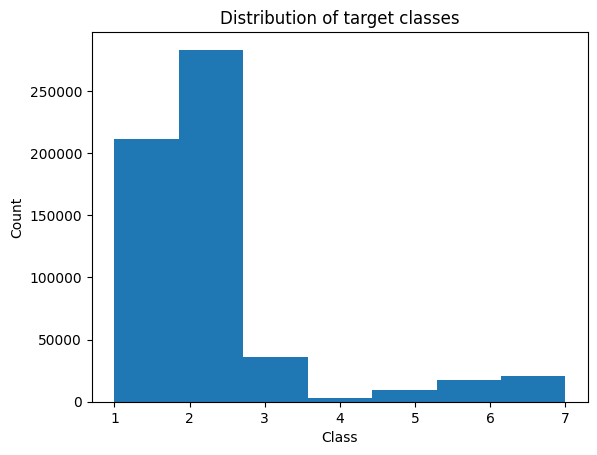

In [ ]:
# Distribution of target classes

import matplotlib.pyplot as plt
import numpy as np

plt.hist(y, bins = 7, rwidth = 0.7)

plt.xlabel("Class")
plt.ylabel("Count")

plt.title('Distribution of target classes')

plt.show()



In [ ]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

X_train

array([[3289.,   22.,   19., ...,    0.,    0.,    0.],
       [2963.,   21.,   18., ...,    0.,    0.,    0.],
       [3037.,  185.,    9., ...,    0.,    0.,    0.],
       ...,
       [3153.,  287.,   17., ...,    0.,    0.,    0.],
       [3065.,  348.,   21., ...,    0.,    0.,    0.],
       [3021.,   26.,   16., ...,    0.,    0.,    0.]])

#### **Q5: Use StandardScaler from sklearn.preprocessing to standardize the features (X_train, X_test)**

In [ ]:
from sklearn.preprocessing import StandardScaler

StdScaler = StandardScaler()

X_train_scaled = StdScaler.fit_transform(X_train)

X_test_scaled = StdScaler.transform(X_test)




#### **Q6: Define a parameter grid for RandomizedSearchCV (consider hyperparameters like `n_estimators`, `max_depth`, etc.)**

In [ ]:
param_distrib = {'bootstrap': [True, False], # Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], # The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
               'max_features': ['auto', 'sqrt'], # The number of features to consider when looking for the best split, default is sqrt
               'min_samples_leaf': [1, 2, 4], # The minimum number of samples required to be at a leaf node
               'n_estimators': [130, 180, 230] # The number of trees in the forest
}

# https://stackoverflow.com/questions/53782169/random-forest-tuning-with-randomizedsearchcv

# pulled parameters from stack overflow example, had more depth than what was given in the problem

#### **Q7: Implement RandomForest Classifier with RandomizedSearchCV (Without PCA)**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)

rnd_search = RandomizedSearchCV(clf, param_distrib, n_iter = 10, cv = 3, random_state=42)





#### **Q8: Train the model with first 1000 instances and use `%timeit` to track the execution time.**

In [ ]:
%timeit rnd_search.fit(X_train_scaled[:1000], y_train[:1000])

y_pred = rnd_search.predict(X_test_scaled)

#### **Q9: Print out best parameters, accuray of the best model on the test data, and execution time without PCA**

In [ ]:
from sklearn.metrics import accuracy_score

print("Best parameters without PCA: ", rnd_search.best_params_)
print("Accuracy without PCA: ", accuracy_score(y_test, y_pred))
print("Execution time without PCA: 17.6 s ± 2.47 s per loop (mean ± std. dev. of 7 runs, 1 loop each)")


Best parameters without PCA:  {'n_estimators': 230, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}
Accuracy without PCA:  0.7171071314854177
Execution time without PCA: 17.6 s ± 2.47 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### **Q10: Use `make_pipeline` to combine PCA and RandomForestClassifier together**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA


clf = make_pipeline(PCA(random_state = 42),
                    RandomForestClassifier(random_state = 42))

clf

Pipeline(steps=[('pca', PCA(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

#### **Q11: Define a parameter grid for RandomizedSearchCV (consider hyperparameters like `n_components`, `n_estimators`, `max_depth`, etc.)**

In [ ]:
# param_distrib = {
    # "pca__n_components": np.arange(10, 80),
    # "randomforestclassifier__n_estimators": np.arange(50, 500),
    # 'RandomForestClassifer__bootstrap': [True, False],
    # 'RandomForestClassifer__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
    # 'RandomForestClassifer__max_features': ['auto', 'sqrt'],
    # 'RandomForestClassifer__min_samples_leaf': [1, 2, 4]
# }

param_distrib = {
    "pca__n_components": np.arange(10, 80),
    "randomforestclassifier__n_estimators": np.arange(50, 500),
    "randomforestclassifier__max_depth": np.arange(10,100),
    "randomforestclassifier__min_samples_leaf": np.arange(1,10)
}

#### **Q12: Implement RandomForest Classifier with RandomizedSearchCV (With PCA)**

In [ ]:
rnd_search_2 = RandomizedSearchCV(clf, param_distrib, n_iter = 10, cv = 3, random_state = 42)

# n_iter specifies the number of iterations to run for hyperparameter optimization

# cv is cross validation (Determines the cross-validation splitting strategy)

# https://stackoverflow.com/questions/69936288/what-exactly-is-n-iter-hyperparameter-in-randomizedsearch

# https://linuxhint.com/timeit-jupyter-notebook/



#### **Q13: Train the model with first 1000 instances and use `%timeit` to track the execution time.**

In [ ]:
%timeit rnd_search_2.fit(X_train_scaled[:1000], y_train[:1000])

y_pred_PCA = rnd_search_2.predict(X_test_scaled)

#### **Q14: Print out best parameters, accuray of the best model on the test data, and execution time with PCA**

In [ ]:
print("Best parameters with PCA: ", rnd_search_2.best_params_)
print("Accuracy with PCA: ", accuracy_score(y_test, y_pred_PCA))
print("Execution time with PCA: 29.7 s ± 1.58 s per loop (mean ± std. dev. of 7 runs, 1 loop each)")



Best parameters with PCA:  {'randomforestclassifier__n_estimators': 386, 'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__max_depth': 11, 'pca__n_components': 50}
Accuracy with PCA:  0.7006101391530339
Execution time with PCA: 29.7 s ± 1.58 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### **Q15: Click Share at the top right. Ensure sharing settings are set to "Anyone with the link can edit." Copy the shared link. Submit this link to the Canvas assignment page.**

In [ ]:
X_train_scaled.shape

(464809, 54)

In [ ]:
%%timeit

rnd_search_2.fit(X_train_scaled[:40000], y_train[:40000])

y_pred_PCA_2 = rnd_search_2.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-pack

In [ ]:
print("Accuracy with PCA: ", accuracy_score(y_test, y_pred_PCA_2))

Accuracy with PCA:  0.8434463826235123


In [ ]:
%%timeit

rnd_search_2.fit(X_train_scaled[:400000], y_train[:400000])

y_pred_PCA_3 = rnd_search_2.predict(X_test_scaled)

In [ ]:
print("Accuracy with PCA v3: ", accuracy_score(y_test, y_pred_PCA_3))